First we define a triangular matrix with known eigenvalues and a random vector $b$.

In [1]:
lambda = @. 10 + (1:100)

using LinearAlgebra
A = triu(rand(100,100),1) + diagm(0=>lambda)
b = rand(100);

Next we build up the first ten Krylov matrices iteratively, using renormalization after each matrix-vector multiplication. 

In [2]:
Km = [b zeros(100,29)]
for m = 1:29      
    v = A*Km[:,m]
    Km[:,m+1] = v/norm(v)
end

Now we solve a least squares problem for Krylov matrices of increasing dimension.

In [3]:
resid = zeros(30)
for m = 1:30  
    z = (A*Km[:,1:m])\b
    x = Km[:,1:m]*z
    resid[m] = norm(b-A*x)
end

The linear system approximations show smooth linear convergence at first, but the convergence stagnates after only a few digits have been found.

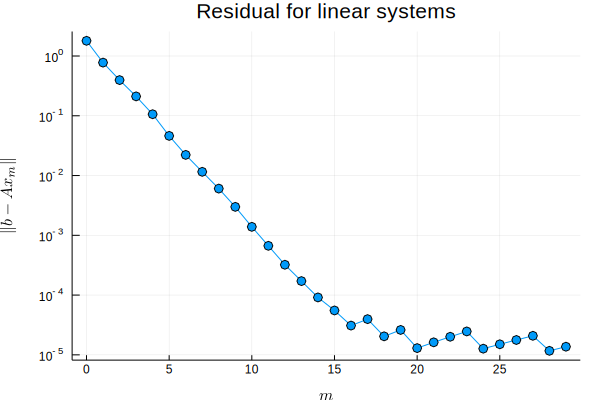

In [4]:
using Plots
plot(0:29,resid,m=:o,
    xaxis=("\$m\$"),yaxis=(:log10,"\$\\| b-Ax_m \\|\$"), 
    title="Residual for linear systems",leg=:none)